# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # for viewing a grid on plot

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv',index_col=None)
display(heroes_df.head(10))
powers_df = pd.read_csv('super_hero_powers.csv',index_col=None)
display(powers_df.head(10))

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Abraxas,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,Absorbing Man,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,Adam Monroe,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Adam Strange,False,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9,Agent Bob,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
display(heroes_df.shape)
display(heroes_df.describe())
display(heroes_df.info())
display(heroes_df.dtypes)
display(powers_df.shape)
display(powers_df.info())
display(powers_df.dtypes)
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
display(heroes_df.head(10))

(734, 11)

,Unnamed: 0,Height,Weight
count,734.000000,734.000000,732.000000
mean,366.500000,102.254087,43.855191
std,212.031837,139.624543,130.823733
min,0.000000,-99.000000,-99.000000
25%,183.250000,-99.000000,-99.000000
50%,366.500000,175.000000,62.000000
75%,549.750000,185.000000,90.000000
max,733.000000,975.000000,900.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
Unnamed: 0    734 non-null int64
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


None

Unnamed: 0      int64
name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

(667, 168)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


None

hero_names               object
Agility                    bool
Accelerated Healing        bool
Lantern Power Ring         bool
Dimensional Awareness      bool
                          ...  
Phoenix Force              bool
Molecular Dissipation      bool
Vision - Cryo              bool
Omnipresent                bool
Omniscient                 bool
Length: 168, dtype: object

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
display(heroes_df.isna().sum())
display(powers_df.isna().sum())
display(heroes_df.Publisher.isna().value_counts(normalize=True))
display(heroes_df.Weight.isna().value_counts(normalize=True))

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

False    0.979564
True     0.020436
Name: Publisher, dtype: float64

False    0.997275
True     0.002725
Name: Weight, dtype: float64

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




mean      102.254087
median    175.000000
std       139.624543
Name: Height, dtype: float64

mean       43.855191
median     62.000000
std       130.823733
Name: Weight, dtype: float64

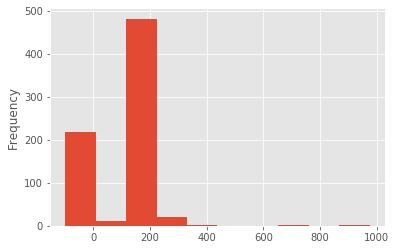

In [5]:
display(heroes_df.Height.agg(['mean','median','std']))
display(heroes_df.Weight.agg(['mean','median','std']))
heroes_df.Height.plot(kind='hist')

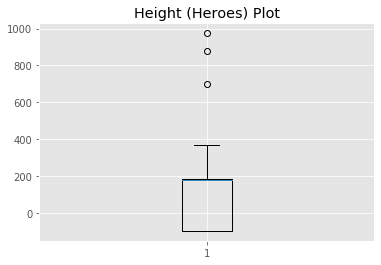

In [6]:
plt.boxplot(heroes_df.Height)
plt.title ("Height (Heroes) Plot")
plt.show()

255    975.0
272    876.0
302    701.0
Name: Height, dtype: float64

[975.0, 876.0, 701.0]
[175.0, 175.0, 175.0]


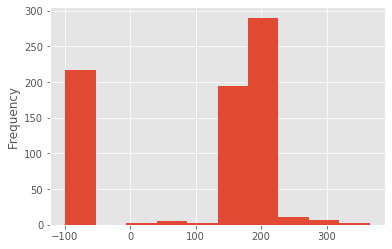

In [7]:
display(heroes_df.loc[heroes_df.Height > 400,'Height'])
h_outlier_list = list(heroes_df.loc[heroes_df.Height > 400,'Height'])
print(h_outlier_list)
h_median_list = list(heroes_df.Height.median() for i in range(0,len(h_outlier_list)))
print(h_median_list)
heroes_df.Height.replace(h_outlier_list,h_median_list,inplace=True)
heroes_df.Height.plot(kind='hist')

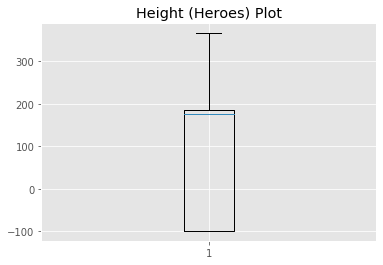

In [8]:
plt.boxplot(heroes_df.Height)
plt.title ("Height (Heroes) Plot")
plt.show()

name          217
Gender        217
Eye color     217
Race          217
Hair color    217
Height        217
Publisher     208
Skin color    217
Alignment     217
Weight        217
dtype: int64

51

array([203. , 191. , 185. , -99. , 193. , 173. , 178. , 188. , 180. ,
       244. , 257. , 183. , 165. , 163. , 211. ,  61. , 229. , 213. ,
       175. , 198. , 168. , 170. , 201. , 218. ,  30.5, 196. , 157. ,
       226. , 267. , 122. , 142. ,  62.5, 108. , 259. ,  79. , 155. ,
        71. , 287. , 234. ,  64. , 366. , 206. , 305. , 297. , 137. ,
       279. ,  15.2, 140. , 160. , 304.8,  66. ])

-99.0     0.295640
 183.0    0.080381
 188.0    0.069482
 178.0    0.053134
 180.0    0.051771
 175.0    0.050409
 185.0    0.047684
 168.0    0.039510
 170.0    0.035422
 165.0    0.035422
 191.0    0.028610
 193.0    0.028610
 198.0    0.024523
 173.0    0.023161
 201.0    0.014986
 196.0    0.014986
 163.0    0.010899
 213.0    0.009537
 203.0    0.006812
 211.0    0.006812
 157.0    0.006812
 244.0    0.005450
 229.0    0.004087
 218.0    0.004087
 155.0    0.004087
 226.0    0.004087
 122.0    0.002725
 30.5     0.002725
 279.0    0.002725
 137.0    0.002725
 305.0    0.002725
 366.0    0.002725
 206.0    0.002725
 62.5     0.001362
 61.0     0.001362
 267.0    0.001362
 304.8    0.001362
 259.0    0.001362
 15.2     0.001362
 297.0    0.001362
 287.0    0.001362
 257.0    0.001362
 142.0    0.001362
 66.0     0.001362
 160.0    0.001362
 140.0    0.001362
 64.0     0.001362
 71.0     0.001362
 79.0     0.001362
 108.0    0.001362
 234.0    0.001362
Name: Height, dtype: float64

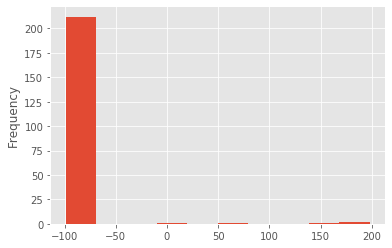

In [9]:
display(heroes_df[heroes_df.Height < 0].count())
display(heroes_df.Height.nunique())
display(heroes_df.Height.unique())
display(heroes_df.Height.value_counts(normalize=True))
heroes_df.loc[heroes_df.Height < 0,'Weight'].plot(kind='hist')

In [10]:
display(heroes_df[(heroes_df.Height < 0) & (heroes_df.Weight > 0)].count())
heroes_df[(heroes_df.Height < 0) & (heroes_df.Weight > 0)]

name          5
Gender        5
Eye color     5
Race          5
Hair color    5
Height        5
Publisher     5
Skin color    5
Alignment     5
Weight        5
dtype: int64

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
54,Atom IV,Male,brown,-,Black,-99.0,DC Comics,-,good,72.0
346,Iron Monger,Male,blue,-,No Hair,-99.0,Marvel Comics,-,bad,2.0
652,T-800,Male,red,Cyborg,-,-99.0,Dark Horse Comics,-,bad,176.0
653,T-850,Male,red,Cyborg,-,-99.0,Dark Horse Comics,-,bad,198.0
654,T-X,Female,-,Cyborg,-,-99.0,Dark Horse Comics,silver,bad,149.0


In [11]:
heroes_df[(heroes_df.Height < 0) & (heroes_df.Weight < 0)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0
...,...,...,...,...,...,...,...,...,...,...
711,Watcher,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0
712,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0
713,White Canary,Female,brown,Human,Black,-99.0,DC Comics,-,bad,-99.0
715,Wildfire,Male,-,-,-,-99.0,DC Comics,-,good,-99.0


In [12]:
display(heroes_df[(heroes_df.Height > 0) & (heroes_df.Weight > 0)].Height.agg(['mean','median','std']))

mean      182.987143
median    183.000000
std        26.147333
Name: Height, dtype: float64

In [13]:
display(heroes_df[(heroes_df.Height > 0) & (heroes_df.Weight < 0)].Height.agg(['mean','median','std']))

mean      188.332000
median    183.000000
std        57.440815
Name: Height, dtype: float64

4     -99.0
6     -99.0
14    -99.0
15    -99.0
18    -99.0
       ... 
711   -99.0
712   -99.0
713   -99.0
715   -99.0
723   -99.0
Name: Height, Length: 217, dtype: float64

[-99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0

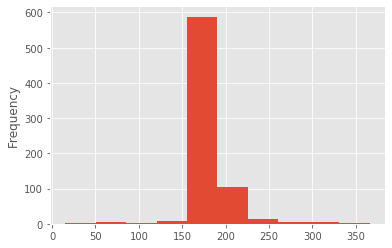

In [14]:
display(heroes_df.loc[heroes_df.Height < 0,'Height'])
h_neg_list = list(heroes_df.loc[heroes_df.Height < 0,'Height'])
print(h_neg_list)
h_median_list2 = list(heroes_df.Height.median() for i in range(0,len(h_neg_list)))
print(h_median_list2)
heroes_df.Height.replace(h_neg_list,h_median_list2,inplace=True)
heroes_df.Height.plot(kind='hist')

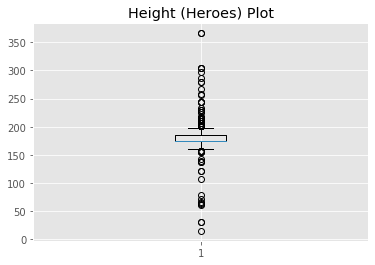

In [15]:
plt.boxplot(heroes_df.Height)
plt.title ("Height (Heroes) Plot")
plt.show()

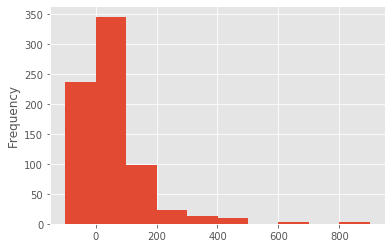

In [16]:
heroes_df.Weight.plot(kind='hist')

In [20]:
display(heroes_df.Weight.isna().value_counts(normalize=True))
display(heroes_df.Weight.nunique())
display(heroes_df.Weight.unique())

False    0.997275
True     0.002725
Name: Weight, dtype: float64

135

array([441.,  65.,  90., -99., 122.,  88.,  61.,  81., 104., 108.,  72.,
       169., 173., 101.,  68.,  57.,  54.,  83.,  86., 358., 135., 106.,
       146.,  63.,  98., 270.,  59.,  50., 126.,  67., 180.,  77.,  52.,
        95.,  79., 133., 181., 216.,  71., 124., 155., 113.,  58.,  92.,
        97.,  56., 230., 495.,  55., 110.,  99., 158.,  74., 116.,  62.,
       170.,  70.,  78., 225., 817.,  27.,  91., 178., 383., 171., 187.,
       132.,  89., 412., 306.,  80., 203.,  96.,  18.,  45., 167.,  16.,
       630., 268.,  nan, 115.,   4.,  48., 119., 207., 191.,   2.,  14.,
        49., 855., 356., 324., 360., 288., 236.,  36., 140., 128., 338.,
       248., 125.,  85., 293.,  69., 405., 117.,  87., 234., 320.,  38.,
        25., 900., 310., 149., 315., 153., 437., 131.,  47., 176., 198.,
       443., 143.,  76.,  82., 105., 331., 214.,  73., 334.,  41., 162.,
        39., 473.,  51.,  17.])

In [19]:
display(heroes_df.loc[heroes_df.Publisher.isna(),['Publisher','Height','Weight']])
display(heroes_df[heroes_df.Publisher.isna()].index)
rm_rows = list(heroes_df[heroes_df.Publisher.isna()].index)
print(rm_rows)

,Publisher,Height,Weight
46,NaN,175.0,-99.0
86,NaN,175.0,-99.0
138,NaN,193.0,-99.0
175,NaN,178.0,-99.0
204,NaN,175.0,-99.0
244,NaN,168.0,-99.0
263,NaN,175.0,-99.0
286,NaN,108.0,NaN
348,NaN,175.0,-99.0
354,NaN,175.0,-99.0


Int64Index([46, 86, 138, 175, 204, 244, 263, 286, 348, 354, 381, 389, 393, 542,
            658],
           dtype='int64')

[46, 86, 138, 175, 204, 244, 263, 286, 348, 354, 381, 389, 393, 542, 658]


In [21]:
#heroes_df.Publisher.dropna(inplace=True)
#display(heroes_df.Publisher.isna().value_counts(normalize=True))
#display(heroes_df.Weight.isna().value_counts(normalize=True))
#heroes_df.Weight.drop(rm_rows,axis=0,inplace=True)
#display(heroes_df.Weight.isna().value_counts(normalize=True))
#heroes_df.Height.drop(rm_rows,axis=0,inplace=True)
#display(heroes_df.Height.isna().value_counts(normalize=True))

heroes_df.drop(rm_rows,axis=0,inplace=True)
display(heroes_df.Weight.isna().value_counts(normalize=True))
display(heroes_df.Publisher.isna().value_counts(normalize=True))

False    1.0
Name: Weight, dtype: float64

False    1.0
Name: Publisher, dtype: float64

In [22]:
display(heroes_df.isna().sum())
display(heroes_df.Height.agg(['mean','median','std']))
display(heroes_df.Weight.agg(['mean','median','std']))

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

mean      180.883171
median    175.000000
std        24.298909
Name: Height, dtype: float64

mean       46.184979
median     63.000000
std       130.675492
Name: Weight, dtype: float64

In [26]:
display(heroes_df.Weight.value_counts(normalize=True))
display(heroes_df[heroes_df.Weight > 0].Weight.agg(['mean','median','std']))

-99.0     0.312935
 79.0     0.031989
 54.0     0.031989
 81.0     0.030598
 90.0     0.026426
            ...   
 132.0    0.001391
 38.0     0.001391
 412.0    0.001391
 320.0    0.001391
 855.0    0.001391
Name: Weight, Length: 135, dtype: float64

mean      112.311741
median     81.000000
std       104.248377
Name: Weight, dtype: float64

In [ ]:
display(heroes_df.loc[heroes_df.Weight < 0,'Weight'])
w_neg_list = list(heroes_df.loc[heroes_df.Weight < 0,'Weight'])
print(w_neg_list)
w_median_list = list(heroes_df.Weight.median() for i in range(0,len(w_neg_list)))
print(w_median_list)
heroes_df.Weight.replace(w_neg_list,w_median_list,inplace=True)
heroes_df.Weight.plot(kind='hist')

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [ ]:
male_heroes_df = None
female_heroes_df = None

def show_distplot(dataframe, gender, column_name):
    pass

In [ ]:
# Male Height


In [ ]:
# Male Weight


In [ ]:
# Female Height


In [ ]:
# Female Weight


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data